In [21]:
# Third party
import importlib
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


# User
import encode
import pre_process
import layer
import train
import loss

importlib.reload(encode)
importlib.reload(pre_process)
importlib.reload(layer)
importlib.reload(train)
importlib.reload(loss)

from layer import RecurrentLayer
from encode import get_encoder_decoder
from pre_process import build_dataset
from train import sgd
from loss import loss

In [3]:
encoder, decoder = get_encoder_decoder(training_data="../data/shakespear.txt", type='character')
# let's now encode the entire text dataset and store it into a torch.Tensor
with open("../data/shakespear.txt", 'r', encoding='utf-8') as f:
    text = f.read()
text_encoded = torch.tensor(encoder(text), dtype=torch.long)
unique_chars = sorted(list(set(text)))


In [4]:
token_length = 3
dataset =  build_dataset(text_encoded, 3)
train_data, train_targets = dataset["train"]
validation_data, validation_targets = dataset["validation"]
len(train_data), len(validation_data)

(948085, 167309)

In [24]:
embedding_dim = 2
Embedding = torch.randn((len(unique_chars),embedding_dim),requires_grad=True, dtype=torch.float64)

hp = {
    "init_learning_rate": .1,
    "converging_learning_rate": .01,
    "learning_rate": .1,
    "epochs": 1000000,
    "dim_of_embedding": embedding_dim,
    "num_layer_1_nodes": 10,
    "mini_batch_size": 3,
    "token_length": token_length
}

l1 = RecurrentLayer(
    num_of_inputs=hp['dim_of_embedding'],
    num_of_neurons=hp['num_layer_1_nodes'],
    activation_func=torch.tanh,
)
l2 = RecurrentLayer(
    num_of_inputs=hp['num_layer_1_nodes'],
    num_of_neurons=len(unique_chars),
)
layers = [l1, l2]
for l in layers:
    l.require_grad()

loss_list = []
train.sgd(hp, Embedding, layers,train_data , train_targets, loss_list)



epoch: 0, loss: 18.7149
epoch: 10000, loss: 5.1459
epoch: 20000, loss: 3.5737
epoch: 30000, loss: 3.1769
epoch: 40000, loss: 5.2791
epoch: 50000, loss: 4.3374
epoch: 60000, loss: 3.1250
epoch: 70000, loss: 4.8210
epoch: 80000, loss: 5.3262
epoch: 90000, loss: 4.6866
epoch: 100000, loss: 3.2690
epoch: 110000, loss: 3.7737
epoch: 120000, loss: 2.4789
epoch: 130000, loss: 3.7081
epoch: 140000, loss: 3.5105
epoch: 150000, loss: 3.4293
epoch: 160000, loss: 2.5612
epoch: 170000, loss: 3.5732
epoch: 180000, loss: 2.8629
epoch: 190000, loss: 2.9922
epoch: 200000, loss: 2.5560
epoch: 210000, loss: 2.6996
epoch: 220000, loss: 2.6846
epoch: 230000, loss: 4.4417
epoch: 240000, loss: 2.9252
epoch: 250000, loss: 3.1030
epoch: 260000, loss: 3.5308
epoch: 270000, loss: 4.2148
epoch: 280000, loss: 3.1350
epoch: 290000, loss: 4.1428
epoch: 300000, loss: 2.7657
epoch: 310000, loss: 2.9688
epoch: 320000, loss: 2.8932
epoch: 330000, loss: 4.5083
epoch: 340000, loss: 3.1743
epoch: 350000, loss: 3.2439
epoch

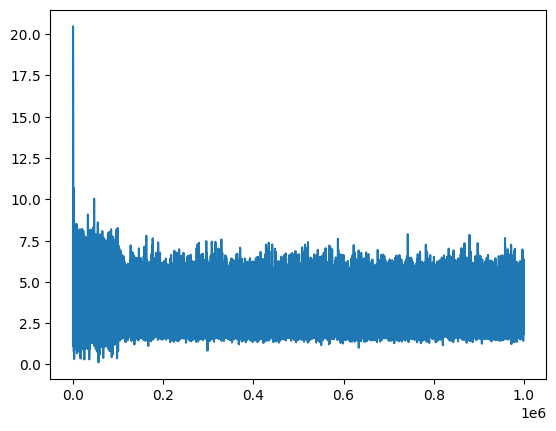

In [25]:
plt.plot(loss_list)

In [23]:
# Compute negative log likelihood of the train/validation

#train_loss = loss(train_data, train_targets, Embedding, layers, hp)
validation_loss = loss(validation_data, validation_targets, Embedding, layers, hp)
#print(f"train loss: {train_loss}")
print(f"validation loss: {validation_loss}")



RuntimeError: The size of tensor a (167309) must match the size of tensor b (948085) at non-singleton dimension 0

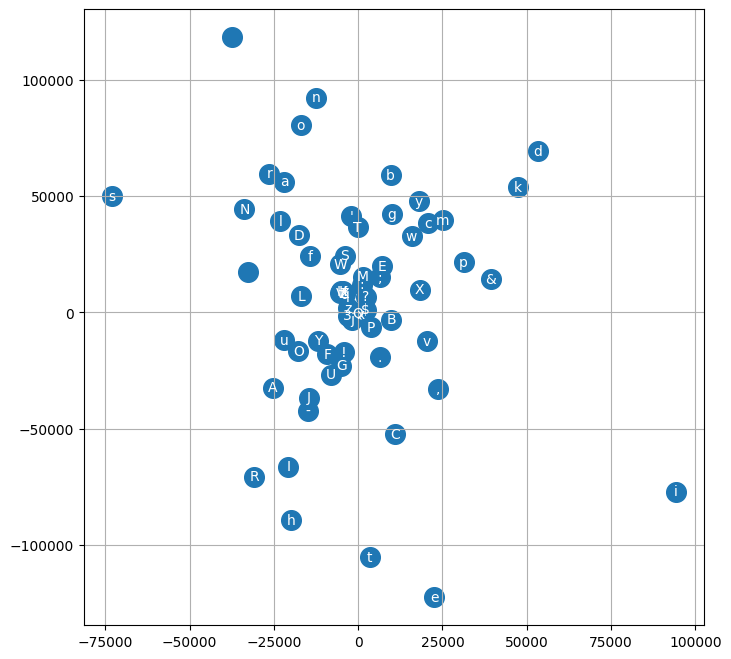

In [26]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
itos = {i: ch for i, ch in enumerate(unique_chars)}
plt.figure(figsize=(8,8))
plt.scatter(Embedding[:,0].data, Embedding[:,1].data, s=200)
for i in range(Embedding.shape[0]):
    plt.text(Embedding[i,0].item(), Embedding[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

